In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import math

In [2]:
def f(x,a,b):
    return a*x+b

In [3]:
def f(x,y):
    return 4+x+y
def g(x,y):
    return 1+2*y
def h(x,y):
    return 2*x
def i(x,y):
    return 5
def j(x,y):
    return 5+x
def l(x,y):
    return 5+y
def m(x,y):
    return max(f(x,y),g(x,y),h(x,y),i(x,y),j(x,y),l(x,y))


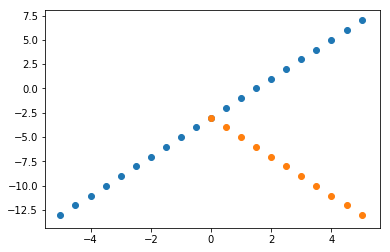

In [4]:
plt.scatter(x,F)
plt.scatter(y,G)

In [5]:
np.hstack((np.stack((x,F)),np.stack((y,G))))

array([[ -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,
         -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,
          4. ,   4.5,   5. ,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,
          3. ,   3.5,   4. ,   4.5,   5. ],
       [-13. , -12. , -11. , -10. ,  -9. ,  -8. ,  -7. ,  -6. ,  -5. ,
         -4. ,  -3. ,  -2. ,  -1. ,   0. ,   1. ,   2. ,   3. ,   4. ,
          5. ,   6. ,   7. ,  -3. ,  -4. ,  -5. ,  -6. ,  -7. ,  -8. ,
         -9. , -10. , -11. , -12. , -13. ]])

In [6]:
Curve = np.hstack((np.stack((x,F)),np.stack((y,G)))).T


In [7]:
from sklearn.metrics.pairwise import euclidean_distances

X1, Y1 = make_classification(n_samples=100,n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1,n_classes=2,class_sep=2)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=30, edgecolor='k')

In [8]:
X, Y = make_blobs(n_samples=70, centers=Curve, n_features=2,
                 random_state=0,cluster_std =0.2)

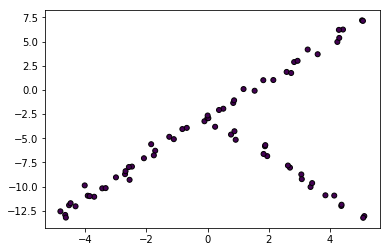

In [9]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=np.ones(70),
            s=25, edgecolor='k')

In [10]:
r = np.random.uniform(-14,10,(200,2))

In [11]:
lr = (np.min(euclidean_distances(Curve,r),axis = 0)>1)*1.

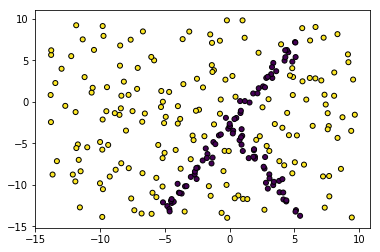

In [12]:
plt.scatter(r[:, 0], r[:, 1], marker='o', c=lr,
            s=25, edgecolor='k')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=np.ones(70),
            s=25, edgecolor='k')

In [13]:
lr

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.])

In [14]:
Xtrain = np.concatenate((r,X))
Ytrain = np.concatenate((lr,np.zeros(70))).astype(float)
Xtrain.shape,Ytrain.shape

((270, 2), (270,))

In [15]:
Ytrain = Ytrain.reshape(-1,1)
Ytrain.shape

(270, 1)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.optim.optimizer import Optimizer

In [17]:
class Simple_Net(nn.Module):
    def __init__(self):
        super(type(self), self).__init__()
        self.f1 = nn.Linear(2, 8)
        self.f2 = nn.Linear(8,  8)
        self.f3 = nn.Linear(8,  8)
        self.f4 = nn.Linear(8,  8)
        self.f5 = nn.Linear(8,  1)
    def forward(self, x):
        out = x
        out = F.relu(self.f1(out))
        out = F.relu(self.f2(out))
        out = F.relu(self.f3(out))
        out = F.relu(self.f4(out))
        out =self.f5(out)
        return out  

In [18]:
class csvDataset():
    def __init__(self, data,label, transform=None):
        self.label = label
        self.data = data
        #self.train_set = TensorDataset()
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        data = self.data[idx]
        label = self.label[idx]
        sample = { 'data': data,'label': label}
        if self.transform:
            sample = self.transform(sample)
        return sample
    
class ToTensor(object):
    def __call__(self, sample):
        data, label= sample['data'],sample['label']
        return {'data': torch.from_numpy(data).float(),'label': torch.from_numpy(label).float()}

In [19]:
def accuracy(model, dataloader,size):
    """ Computes the model's classification accuracy on the train dataset
    Computes classification accuracy and loss(optional) on the test dataset
    The model should return logits
    """
    model.eval()
    with torch.no_grad():
        correct = 0.
        for i in (dataloader):
            inputs = i['data']
            labels = i['label']
            inputs, labels = inputs.cuda(), labels.cuda()
            outputs = model(inputs)
            pred = (outputs>0).float()
            correct += (pred.view(-1,1) == labels).sum().item()
        accuracy = correct / size
        
    return accuracy

In [20]:
class Adam_bis(Optimizer):
    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8,
                 weight_decay=0, amsgrad=False, prec = 2):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, amsgrad=amsgrad,prec = prec)
        super(Adam_bis, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(Adam_bis, self).__setstate__(state)
        for group in self.param_groups:
            group.setdefault('amsgrad', False)

    def step(self, closure=None):
        """Performs a single optimization step.

        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')
                amsgrad = group['amsgrad']

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)
                    if amsgrad:
                        # Maintains max of all exp. moving avg. of sq. grad. values
                        state['max_exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                if amsgrad:
                    max_exp_avg_sq = state['max_exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                if group['weight_decay'] != 0:
                    grad.add_(group['weight_decay'], p.data)

                # Decay the first and second moment running average coefficient
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                if amsgrad:
                    # Maintains the maximum of all 2nd moment running avg. till now
                    torch.max(max_exp_avg_sq, exp_avg_sq, out=max_exp_avg_sq)
                    # Use the max. for normalizing running avg. of gradient
                    denom = max_exp_avg_sq.sqrt().add_(group['eps'])
                else:
                    denom = exp_avg_sq.sqrt().add_(group['eps'])

                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                step_size = group['lr'] * math.sqrt(bias_correction2) / bias_correction1

                p.data = (p.data.addcdiv_(-step_size, exp_avg, denom)).mul(10**group['prec']).trunc().div(10**group['prec'])

        return loss

In [21]:
def train_model_cc_fast(model, trainloader, criterion, optimizer,size, num_epochs=25):
    model = model.cuda()
    train_accuracy = []
    for epoch in range(num_epochs):
        model.train(True)
        for i in trainloader:
            inputs = i['data']
            labels = i['label']
            inputs, labels = inputs.cuda(), labels.cuda()
            def closure():
                optimizer.zero_grad()
                logits = model.forward(inputs)
                loss = criterion(logits, labels)
                loss.backward()
                return loss
            loss = optimizer.step(closure)

        train_accuracy.append(accuracy(model, trainloader,size))

    return model, train_accuracy 

In [22]:
model = Simple_Net()
#optimizer = optim.Adam(model.parameters(), weight_decay=0.01)
optimizer = Adam_bis(model.parameters(), prec = 4,weight_decay=0)
criterion = F.binary_cross_entropy_with_logits
file_dataset = csvDataset(Xtrain,Ytrain,transform= ToTensor())
final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=3, shuffle=True)

In [23]:
model,train_accuracy = train_model_cc_fast(model, final_loader, criterion,
    optimizer,Xtrain.shape[0], num_epochs=50)

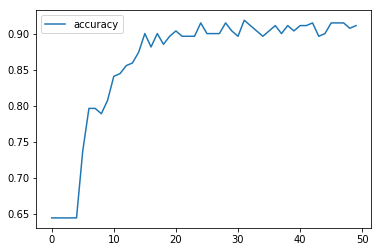

In [24]:
plt.plot(train_accuracy,label='accuracy')
plt.legend()

In [25]:
rez={}
for name, param in model.named_parameters():
    if param.requires_grad:
        rez[name] = param.cpu().detach().numpy()*10**4

In [26]:
t = np.linspace(-14, 10,100, endpoint=False)
T = np.zeros((10100,2))
a=0
for i in t:
    for j in t:
        T[a]=np.array([i,j])
        a+=1
    a+=1

In [27]:
inference_dataset = csvDataset(T,np.zeros((10100,2)),transform= ToTensor())
inference_loader = torch.utils.data.DataLoader(inference_dataset,batch_size=10100, shuffle=False)
model.eval()
with torch.no_grad():
    for i in inference_loader:
            inputs = i['data']
            labels = i['label']
            inputs, labels = inputs.cuda(), labels.cuda()
    out = model.forward(inputs)

In [28]:
np.min(out.cpu().numpy())

-1.8086143

In [29]:
R = inputs.cpu().numpy()

In [33]:
rrr = ((out>-0.3)*(out<0.3)).cpu().numpy()

In [34]:
rr = rrr.reshape(10100)

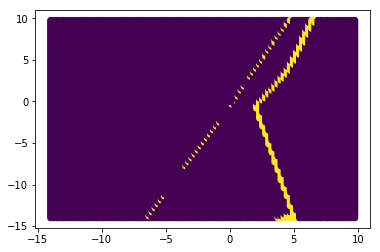

In [35]:
plt.scatter(R[:, 0], R[:, 1], c =rr)